In [2]:
import pandas as pd

Data Collection & analysis

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


categorical values
    Item_Identifier
    Item_Fat_Content 
    Item_Type 
    Outlet_Identifier 
    Outlet_Size 
    Outlet_Location_Type
    Outlet_Type

In [6]:
df.shape

(8523, 12)

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Mean will be use to converting null value in weight

mode will be use to convert null value in Size bcz it is a categorical value

In [8]:
df['Item_Weight'].mean()

12.857645184135976

In [9]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [10]:
df['Item_Weight'].isnull().sum()

0

In [11]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [13]:
mode_of_Outlet_Size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [14]:
mode_of_Outlet_Size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [15]:
missing_values = df['Outlet_Size'].isnull()

In [16]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [17]:
df.loc[missing_values, 'Outlet_Size'] = df.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_Outlet_Size[x])

In [18]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

ALL missing data Handled

Data ANALYSIS

In [19]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [20]:
import seaborn as sns

In [21]:
sns.set()

In [22]:
import matplotlib.pyplot as plt

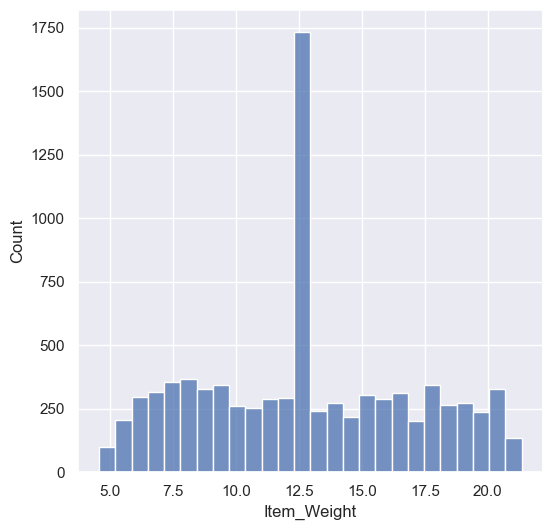

In [23]:
plt.figure(figsize=(6, 6))
sns.histplot(df['Item_Weight'])
plt.show()

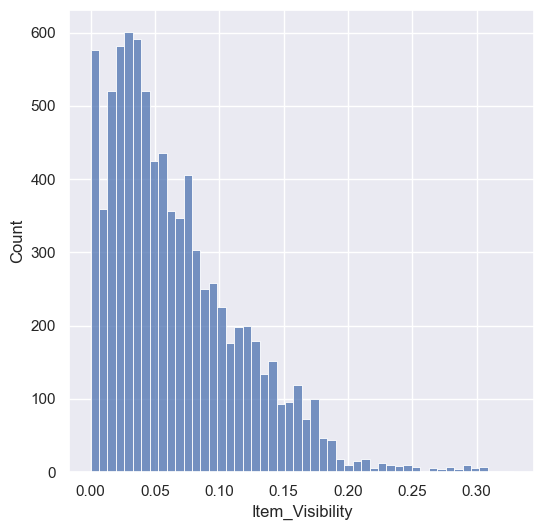

In [24]:
plt.figure(figsize=(6, 6))
sns.histplot(df['Item_Visibility'])
plt.show()

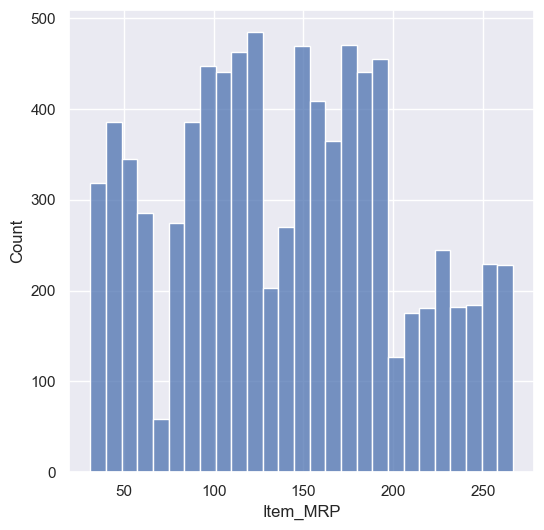

In [25]:
plt.figure(figsize=(6, 6))
sns.histplot(df['Item_MRP'])
plt.show()

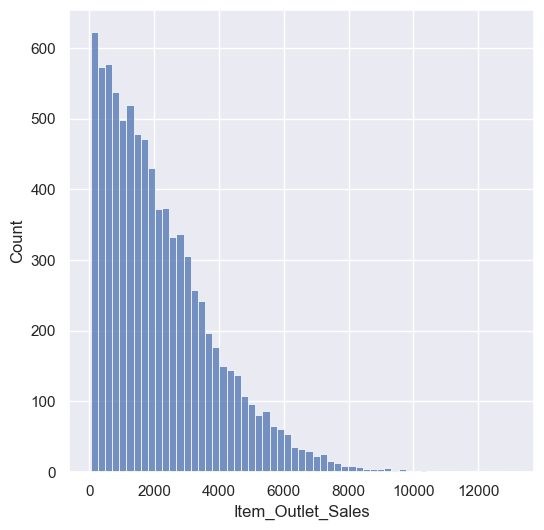

In [26]:
plt.figure(figsize=(6, 6))
sns.histplot(df['Item_Outlet_Sales'])
plt.show()

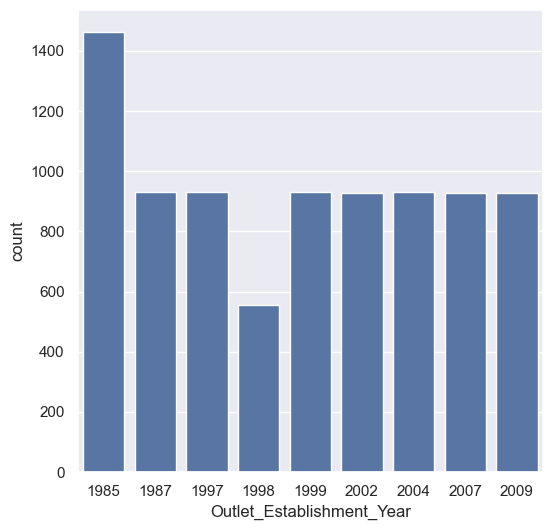

In [27]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Outlet_Establishment_Year', data=df)
plt.show()

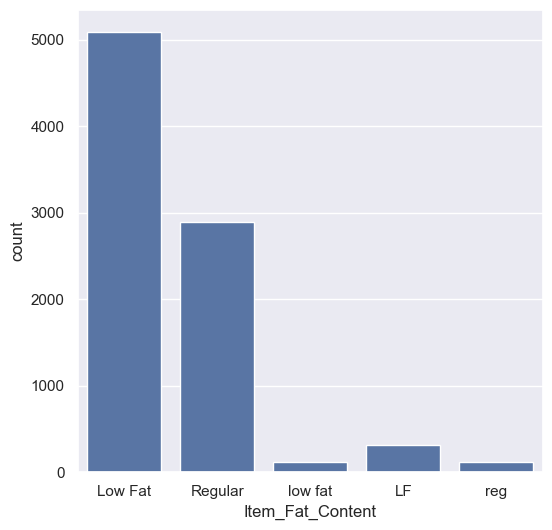

In [28]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Item_Fat_Content', data=df)
plt.show()

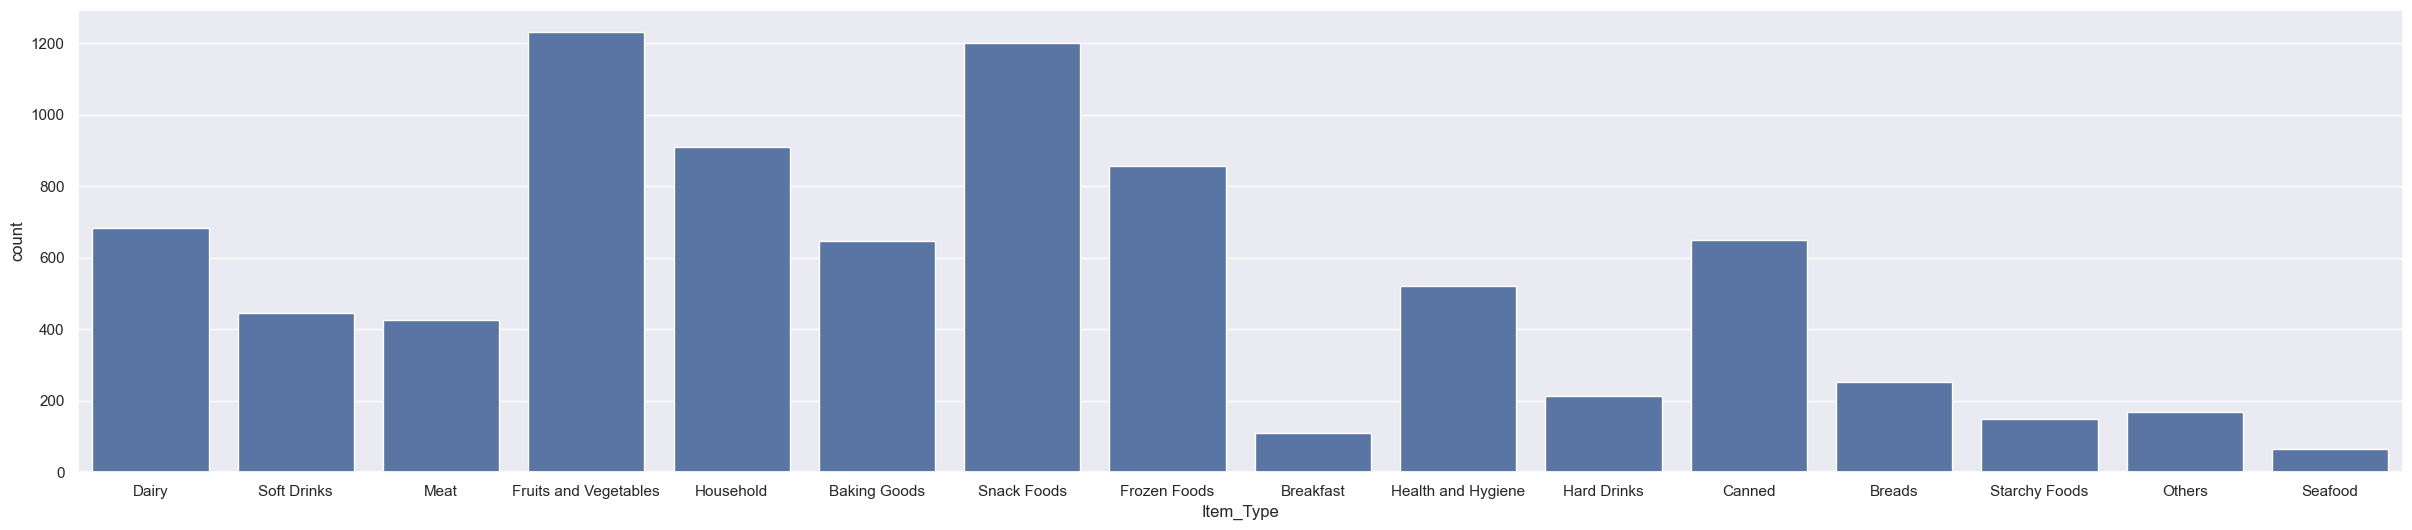

In [29]:
plt.figure(figsize=(30, 6))
sns.countplot(x='Item_Type', data=df)
plt.show()

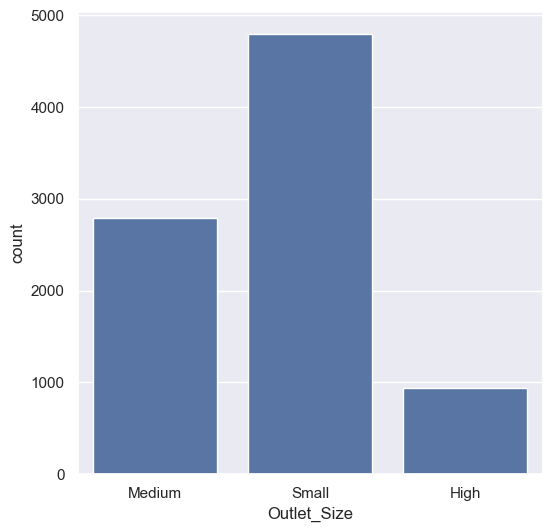

In [30]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Outlet_Size', data=df)
plt.show()

In [31]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [32]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [33]:
df.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace=True)

In [34]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Labled Encodeing

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
encoder = LabelEncoder()

In [37]:
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])


In [38]:
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])

df['Item_Type'] = encoder.fit_transform(df['Item_Type'])

df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])

df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])

df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])

df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [39]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Spliting features and target 

In [40]:
x = df.drop(columns='Item_Outlet_Sales',axis=1)
y = df['Item_Outlet_Sales']

In [41]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [42]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

Spliting and testing data

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [45]:
print(x.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


training model

XGBREGRESSOR

In [46]:
from xgboost import XGBRegressor


In [47]:
regressor = XGBRegressor()

In [48]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [49]:
training_data_prediction = regressor.predict(X_train)

In [50]:
from sklearn import metrics

In [51]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [52]:
print('R Squared value = ', r2_train)

R Squared value =  0.8762174618111388


In [53]:
testing_data_prediction = regressor.predict(X_test)

In [54]:
r2_test = metrics.r2_score(Y_test, testing_data_prediction)

In [55]:
print('R Squared value = ', r2_test)

R Squared value =  0.5017253991620692


In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [58]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [59]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [60]:
y_pred = model.predict(X_test)

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1200321.9772375566


In [63]:
import numpy as np

In [64]:

from sklearn.metrics import r2_score
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Mean Squared Error: 1200321.9772375566
Root Mean Squared Error: 1095.5920669836728
R-squared: 0.5583755715412662


In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, x, y, cv=5, scoring='r2')

# Print cross-validation scores
print("Cross-Validation R-squared scores:", cv_scores)
print("Mean R-squared:", cv_scores.mean())

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define Random Forest model
model = RandomForestRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Cross-validation with the best model
cv_scores = cross_val_score(best_model, x, y, cv=5, scoring='r2')
print("Cross-Validation R-squared scores:", cv_scores)
print("Mean R-squared:", cv_scores.mean())

KeyboardInterrupt: 

In [67]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Figure(1000x400)


<Axes: xlabel='Item_Visibility'>

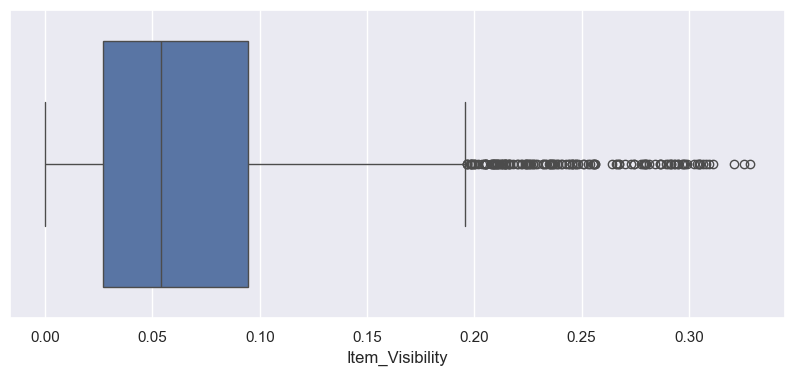

In [69]:
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "Item_Visibility", data = df) 

Figure(1000x400)


<Axes: xlabel='Item_MRP'>

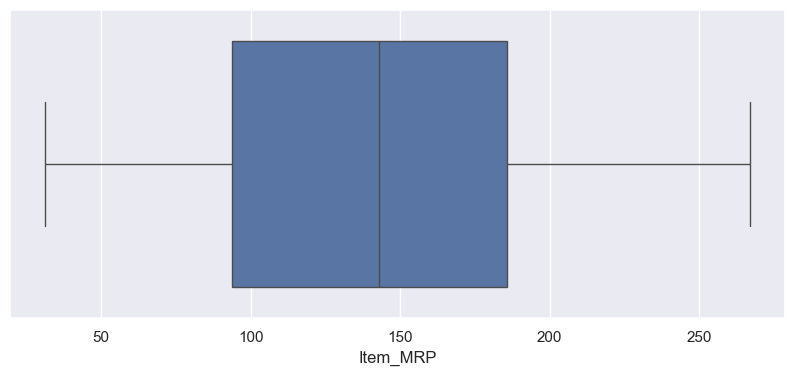

In [70]:
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "Item_MRP", data = df) 

Figure(1000x400)


<Axes: xlabel='Item_Outlet_Sales'>

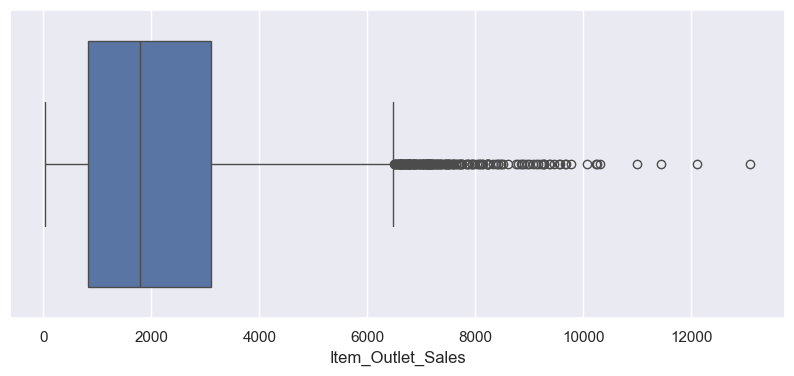

In [71]:
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "Item_Outlet_Sales", data = df)

In [72]:
percentile25 = df['Item_Outlet_Sales'].quantile(0.25)
percentile75 = df['Item_Outlet_Sales'].quantile(0.75)
iqr = percentile75 - percentile25

In [73]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [74]:
df[df['Item_Outlet_Sales'] > upper_limit]
df[df['Item_Outlet_Sales'] < lower_limit]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [75]:
new_df = df[df['Item_Outlet_Sales'] < upper_limit]
new_df.shape

(8337, 12)

Figure(1000x400)


<Axes: xlabel='Item_Outlet_Sales'>

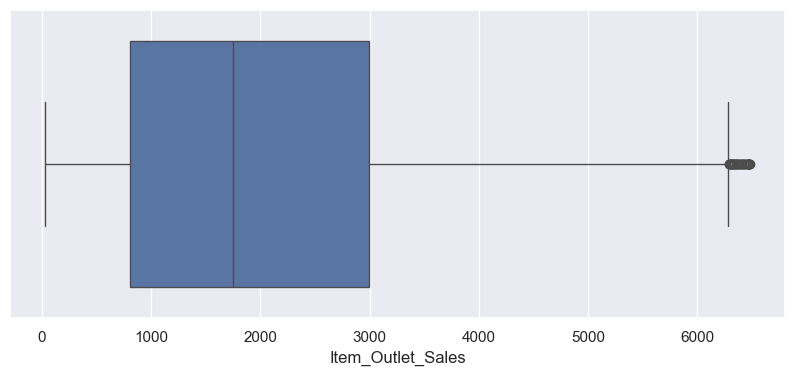

In [76]:
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "Item_Outlet_Sales", data = new_df)

Figure(1000x400)


<Axes: xlabel='Item_Visibility'>

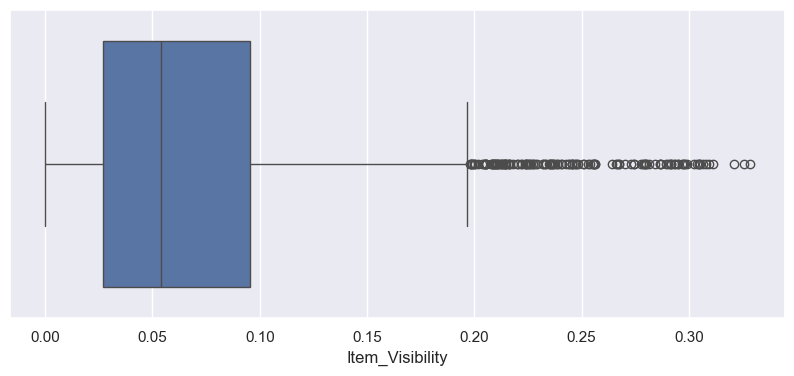

In [77]:
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "Item_Visibility", data = new_df)

In [78]:
percentile25 = new_df['Item_Visibility'].quantile(0.25)
percentile75 = new_df['Item_Visibility'].quantile(0.75)
iqr = percentile75 - percentile25

In [79]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [80]:
new_df[new_df['Item_Visibility'] > upper_limit]
new_df[new_df['Item_Visibility'] < lower_limit]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [82]:
new_df = new_df[new_df['Item_Visibility'] < upper_limit]
new_df.shape

(8382, 12)

Figure(1000x400)


<Axes: xlabel='Item_Visibility'>

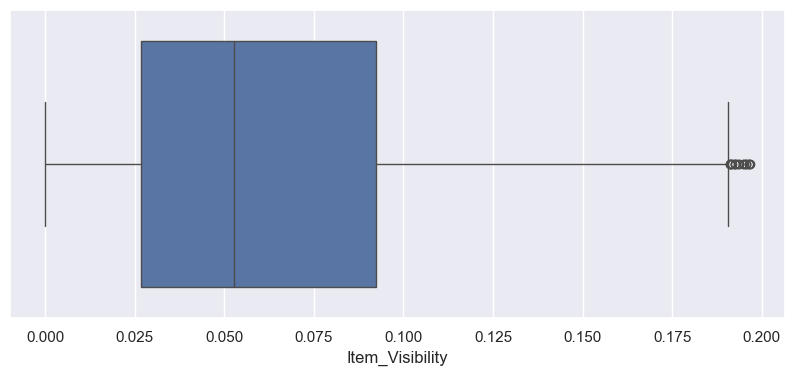

In [83]:
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "Item_Visibility", data = new_df)

Figure(1000x400)


<Axes: xlabel='Item_Outlet_Sales'>

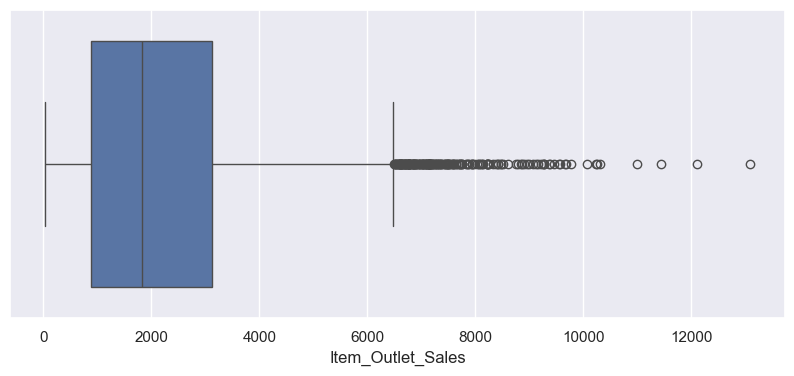

In [84]:
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "Item_Outlet_Sales", data = new_df)

In [86]:
percentile25 = new_df['Item_Outlet_Sales'].quantile(0.25)
percentile75 = new_df['Item_Outlet_Sales'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
new_df[new_df['Item_Outlet_Sales'] > upper_limit]
new_df[new_df['Item_Outlet_Sales'] < lower_limit]
new_df = new_df[new_df['Item_Outlet_Sales'] < upper_limit]
new_df.shape

(8196, 12)

Figure(1000x400)


<Axes: xlabel='Item_Outlet_Sales'>

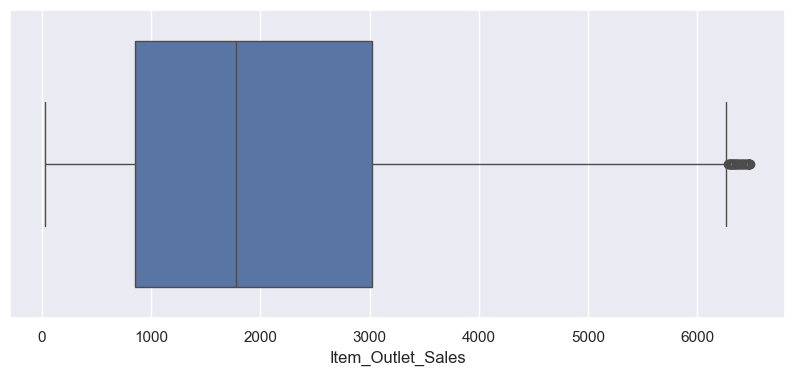

In [87]:
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "Item_Outlet_Sales", data = new_df)

Figure(1000x400)


<Axes: xlabel='Item_Visibility'>

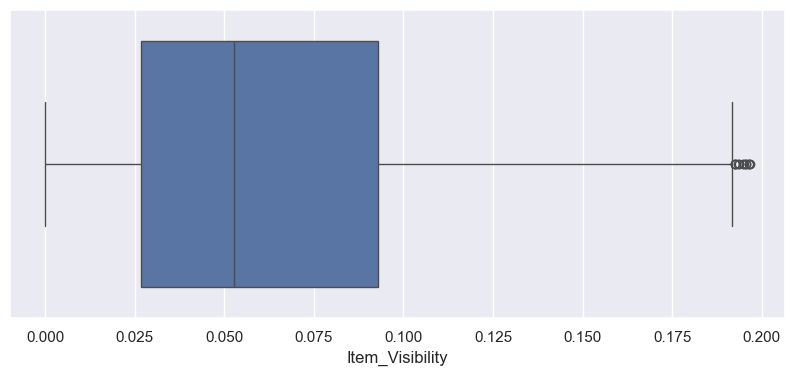

In [88]:
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "Item_Visibility", data = new_df)

In [89]:
percentile25 = new_df['Item_Outlet_Sales'].quantile(0.25)
percentile75 = new_df['Item_Outlet_Sales'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
new_df[new_df['Item_Outlet_Sales'] > upper_limit]
new_df[new_df['Item_Outlet_Sales'] < lower_limit]
new_df = new_df[new_df['Item_Outlet_Sales'] < upper_limit]
new_df.shape

(8156, 12)

Figure(1000x400)


<Axes: xlabel='Item_Outlet_Sales'>

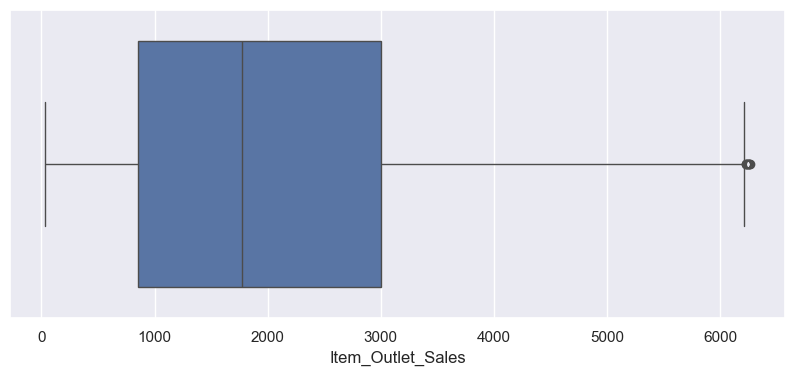

In [90]:
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "Item_Outlet_Sales", data = new_df)

Figure(1000x400)


<Axes: xlabel='Item_Visibility'>

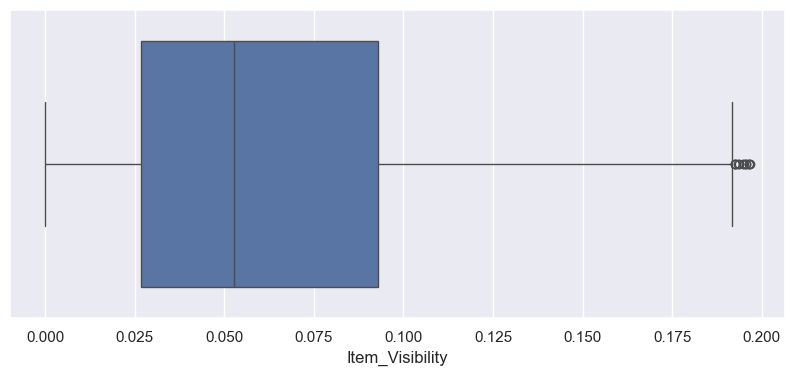

In [91]:
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "Item_Visibility", data = new_df)

In [92]:
percentile25 = new_df['Item_Outlet_Sales'].quantile(0.25)
percentile75 = new_df['Item_Outlet_Sales'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
new_df[new_df['Item_Outlet_Sales'] > upper_limit]
new_df[new_df['Item_Outlet_Sales'] < lower_limit]
new_df = new_df[new_df['Item_Outlet_Sales'] < upper_limit]
new_df.shape

(8149, 12)

Figure(1000x400)


<Axes: xlabel='Item_Outlet_Sales'>

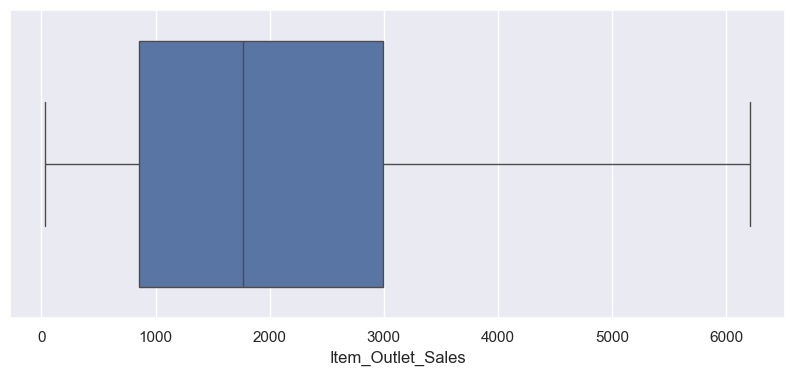

In [93]:
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "Item_Outlet_Sales", data = new_df)

In [94]:
percentile25 = new_df['Item_Visibility'].quantile(0.25)
percentile75 = new_df['Item_Visibility'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
new_df[new_df['Item_Visibility'] > upper_limit]
new_df[new_df['Item_Visibility'] < lower_limit]
new_df = new_df[new_df['Item_Visibility'] < upper_limit]
new_df.shape

(8137, 12)

Figure(1000x400)


<Axes: xlabel='Item_Visibility'>

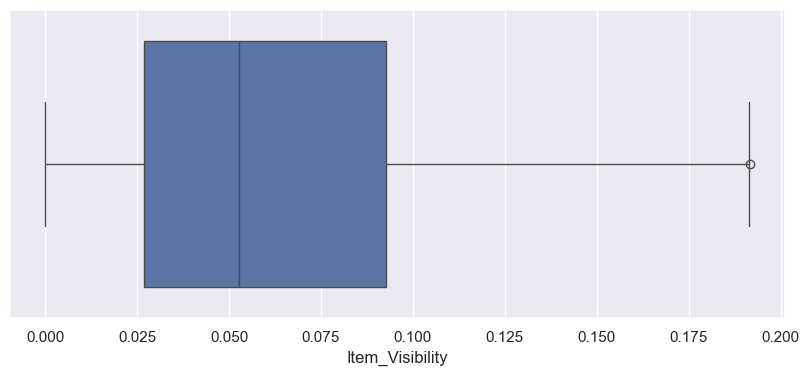

In [95]:
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "Item_Visibility", data = new_df)

In [96]:
percentile25 = new_df['Item_Visibility'].quantile(0.25)
percentile75 = new_df['Item_Visibility'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
new_df[new_df['Item_Visibility'] > upper_limit]
new_df[new_df['Item_Visibility'] < lower_limit]
new_df = new_df[new_df['Item_Visibility'] < upper_limit]
new_df.shape

(8136, 12)

Figure(1000x400)


<Axes: xlabel='Item_Visibility'>

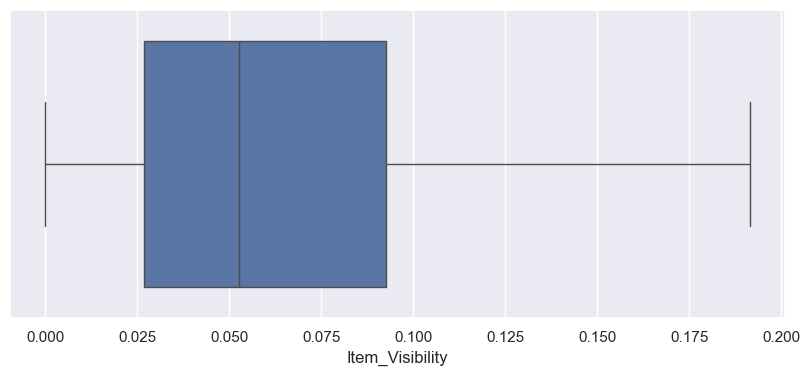

In [97]:
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "Item_Visibility", data = new_df)

In [98]:
print(x)
print(y)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [103]:
x = new_df.drop(columns='Item_Outlet_Sales',axis=1)
y = new_df['Item_Outlet_Sales']

In [104]:


X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [105]:
regressor = XGBRegressor()

regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [106]:
training_data_prediction = regressor.predict(X_train)
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared value = ', r2_train)

R Squared value =  0.867354616509175


In [107]:
testing_data_prediction = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, testing_data_prediction)
print('R Squared value = ', r2_test)

R Squared value =  0.5089737420478488


In [109]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1052476.7971124786
